## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [28]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [29]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [30]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [31]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].value_counts()

g989    13
c757    10
k382    10
q511    10
a897    10
        ..
t573     1
b447     1
h428     1
d133     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

Note there is a possible 10 or less data point time observations for each mouse - increments of 5. Note the g989 may have duplicate observations.  Need to check: 

In [32]:
# Use a copy of the dataframe
clean_mice = mouse_data_df.copy()

In [33]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_check = clean_mice.loc[clean_mice["Mouse ID"] == "g989"]
duplicate_mouse_check.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice = clean_mice.drop_duplicates(subset=["Mouse ID", "Timepoint"], inplace=False)

In [35]:
#Check one of the observed duplicate entries from above
duplicate_entry = clean_mice.loc[clean_mice["Mouse ID"] == "g989"]

In [36]:
#Do a check on the data to confirm the duplicate observations in mouse g989
duplicate_entry.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


Create a clean DataFrame by dropping the duplicate mouse by its ID. - clean_mice is the clean DataFrame

In [37]:
 # Checking the number of mice in the clean DataFrame (249)
clean_mice["Mouse ID"].value_counts()

c757    10
k382    10
g296    10
q511    10
a897    10
        ..
t573     1
b447     1
h428     1
d133     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
for each regimen.
This method is the most straightforward, creating multiple series and putting them all together at the end.

In [38]:
#Generate the mean calculations for each regimen
regimen_mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_mean.head(10)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [39]:
#Generate the median calculations for each regimen
regimen_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_median.head(10)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [40]:
#Generate the variance calculations for each regimen
regimen_var = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_var.head(10)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [41]:
#Generate the standard deviation calculations for each regimen
regimen_std = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_std.head(10)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [42]:
#Generate the standard deviation calculations for each regimen
regimen_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
regimen_sem.head(10)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# Group these stats into a dataframe for merger below
grouped_regimen = pd.DataFrame({"Tumor Mean": regimen_mean,
                                "Tumor Median": regimen_mean,
                                "Tumor Variance": regimen_var,
                                "Tumor Std Dev": regimen_std,
                                "Tumor SEM": regimen_sem                                 
                                    })

In [44]:
grouped_regimen

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [45]:
#Generate the mean calculations for each regimen?? - above

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Characterize the data set using matplotlib and stats.normaltest

regimen_sample_count = clean_mice.groupby("Drug Regimen")["Mouse ID"].nunique()
regimen_count_df = pd.DataFrame({"No of Mice": regimen_sample_count}).reset_index()
regimen_count_df.head(10)

,Drug Regimen,No of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


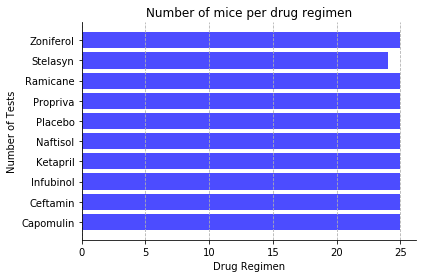

In [47]:
#Create the bar chart showing the number of mice used for each regimen
x_axis_count = regimen_count_df['Drug Regimen']
y_axis_count = regimen_count_df['No of Mice']

plt.barh(x_axis_count, y_axis_count, color='b', alpha=0.7, align="center")

plt.title("Number of mice per drug regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Tests')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().xaxis.grid(True, linestyle='--')

plt.show()

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
#the course of the study using pyplot.



In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mice.groupby("Sex").nunique()["Mouse ID"]
gender_count


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

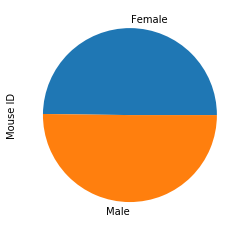

In [50]:
#Create a pie chart using Pandas????
gender_count_chart = gender_count.plot(kind="pie")
plt.show()

In [52]:
#Create the pie chart reflecting the population set 
# plt.pie(gender_count, labels=gender, autopct="%1.1f%%", startangle=90)
# plt.title("Split of gender across the treatment regime")
# plt.show()

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_df = clean_mice.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]


In [91]:
treatment_df2 = pd.DataFrame({"Tumor Volume (mm3)": treatment_df}).reset_index()

In [92]:
treatment_df2.head(15)

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686
5,a401,Zoniferol,66.794156
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
8,a457,Ketapril,49.783419
9,a492,Stelasyn,60.122011


In [93]:
#Sort the df to only include Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_sort = treatment_df2[treatment_df2['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

In [94]:
#Check
treatment_sort.head(20)

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
10,a520,Ramicane,38.810366
11,a577,Infubinol,57.031862
12,a644,Ramicane,32.978522
13,a685,Infubinol,66.083066
19,b128,Capomulin,38.982878


In [95]:
#Show the overall general statistics
treatment_sort.describe()

,Tumor Volume (mm3)
count,100.000000
mean,47.197795
std,12.953884
min,22.050126
25%,37.187744
50%,45.000000
75%,59.930262
max,72.226731


In [96]:
#Seperate out each drug type to do the analysis by drug
Capomulin = treatment_df2.loc[treatment_df2["Drug Regimen"] == "Capomulin", :]
Ceftamin = treatment_df2.loc[treatment_df2["Drug Regimen"] == "Ceftamin", :]
Infubinol = treatment_df2.loc[treatment_df2["Drug Regimen"] == "Infubinol", :]
Ramicane = treatment_df2.loc[treatment_df2["Drug Regimen"] == "Ramicane", :]

In [97]:
#Check one of the datasets
Capomulin.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
19,b128,Capomulin,38.982878
24,b742,Capomulin,38.939633
61,f966,Capomulin,30.485985
64,g288,Capomulin,37.074024
66,g316,Capomulin,40.159220


In [155]:
#Common feature for all the box and whisker charts below
green_diamond = dict(markerfacecolor='g', marker='D')

Capomulin Key Statistical Analyis

In [156]:
#Show the overall Capomulin general statistics
Capomulin.describe()

,Tumor Volume (mm3)
count,25.000000
mean,36.667568
std,5.715188
min,23.343598
25%,32.377357
50%,38.125164
75%,40.159220
max,47.685963


In [157]:
#Calculate the key quantatative data points for Capomulin
CapQ1 = np.percentile(Capomulin["Tumor Volume (mm3)"], 25, interpolation = 'midpoint') 
CapQ2 = np.percentile(Capomulin["Tumor Volume (mm3)"], 50, interpolation = 'midpoint') 
CapQ3 = np.percentile(Capomulin["Tumor Volume (mm3)"], 75, interpolation = 'midpoint') 

IQR_Cap = st.iqr(Capomulin["Tumor Volume (mm3)"], interpolation = 'midpoint')
IQRUp_Cap = CapQ3 + (1.5 * IQR_Cap)
IQRDown_Cap = CapQ1 - (1.5 * IQR_Cap)

print('Q1 25 percentile of the given data is, ', CapQ1) 
print('Q1 50 percentile of the given data is, ', CapQ2) 
print('Q1 75 percentile of the given data is, ', CapQ3) 

print('Interquartile range is', IQR_Cap)
print('The upper limit for outliers is,', IQRUp_Cap)
print('The lower limit for outliers is,', IQRDown_Cap) 
 



Q1 25 percentile of the given data is,  32.37735684
Q1 50 percentile of the given data is,  38.125164399999996
Q1 75 percentile of the given data is,  40.1592203
Interquartile range is 7.781863460000004
The upper limit for outliers is, 51.83201549
The lower limit for outliers is, 20.70456164999999


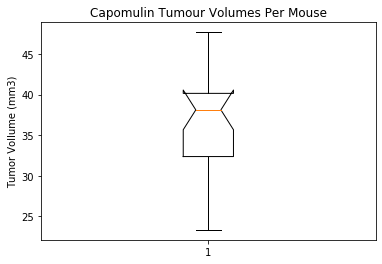

In [158]:
Cap1, Cap_ax1 = plt.subplots()
Cap_ax1.set_title('Capomulin Tumour Volumes Per Mouse')
Cap_ax1.set_ylabel('Tumor Vollume (mm3)')

Cap_ax1.boxplot(Capomulin["Tumor Volume (mm3)"], notch=True, flierprops=green_diamond)
plt.show()

Ceftamin Key Statistical Analyis

In [140]:
#Show the overall Ceftamin general statistics
Ceftamin.describe()

,Tumor Volume (mm3)
count,25.000000
mean,57.753977
std,8.365568
min,45.000000
25%,48.722078
50%,59.851956
75%,64.299830
max,68.923185


In [134]:
#Calculate the key quantatative data points for Ceftamin
CefQ1 = np.percentile(Ceftamin["Tumor Volume (mm3)"], 25, interpolation = 'midpoint') 
CefQ2 = np.percentile(Ceftamin["Tumor Volume (mm3)"], 50, interpolation = 'midpoint') 
CefQ3 = np.percentile(Ceftamin["Tumor Volume (mm3)"], 75, interpolation = 'midpoint') 

IQR_Cef = st.iqr(Ceftamin["Tumor Volume (mm3)"], interpolation = 'midpoint')
IQRUp_Cef = CefQ3 + (1.5 * IQR_Cef)
IQRDown_Cef = CefQ1 - (1.5 * IQR_Cef)

print('Q1 25 percentile of the given data is, ', CefQ1) 
print('Q1 50 percentile of the given data is, ', CefQ2) 
print('Q1 75 percentile of the given data is, ', CefQ3) 

print('Interquartile range is', IQR_Cef)
print('The upper limit for outliers is,', IQRUp_Cef)
print('The lower limit for outliers is,', IQRDown_Cef) 


Q1 25 percentile of the given data is,  48.72207785
Q1 50 percentile of the given data is,  59.85195552
Q1 75 percentile of the given data is,  64.29983003
Interquartile range is 15.577752179999997
The upper limit for outliers is, 87.66645829999999
The lower limit for outliers is, 25.355449580000002


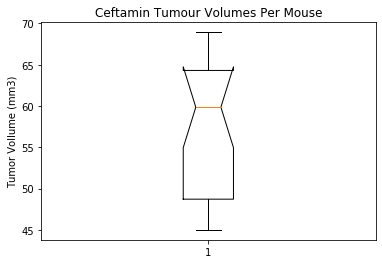

In [154]:
Cef1, Cef_ax1 = plt.subplots()
Cef_ax1.set_title('Ceftamin Tumour Volumes Per Mouse')
Cef_ax1.set_ylabel('Tumor Vollume (mm3)')

Cef_ax1.boxplot(Ceftamin["Tumor Volume (mm3)"], notch=True, flierprops=green_diamond)
plt.show()

Infubinol Key Statistical Analyis

In [141]:
#Show the overall Infubinol general statistics
Infubinol.describe()

,Tumor Volume (mm3)
count,25.000000
mean,58.178246
std,8.602957
min,36.321346
25%,54.048608
50%,60.165180
75%,65.525743
max,72.226731


In [142]:
InfQ1 = np.percentile(Infubinol["Tumor Volume (mm3)"], 25, interpolation = 'midpoint') 
InfQ2 = np.percentile(Infubinol["Tumor Volume (mm3)"], 50, interpolation = 'midpoint') 
InfQ3 = np.percentile(Infubinol["Tumor Volume (mm3)"], 75, interpolation = 'midpoint') 

IQR_Inf = st.iqr(Infubinol["Tumor Volume (mm3)"], interpolation = 'midpoint')
IQRUp_Inf = InfQ3 + (1.5 * IQR_Inf)
IQRDown_Inf = InfQ1 - (1.5 * IQR_Inf)

print('Q1 25 percentile of the given data is, ', InfQ1) 
print('Q1 50 percentile of the given data is, ', InfQ2) 
print('Q1 75 percentile of the given data is, ', InfQ3) 

print('Interquartile range is', IQR_Inf)
print('The upper limit for outliers is,', IQRUp_Inf)
print('The lower limit for outliers is,', IQRDown_Inf) 


Q1 25 percentile of the given data is,  54.04860769
Q1 50 percentile of the given data is,  60.16518046
Q1 75 percentile of the given data is,  65.52574285
Interquartile range is 11.477135160000003
The upper limit for outliers is, 82.74144559000001
The lower limit for outliers is, 36.83290494999999


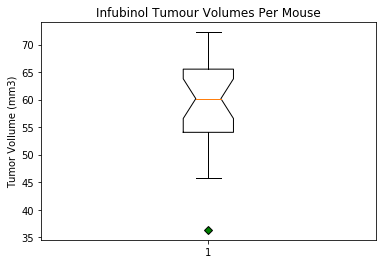

In [159]:
Inf1, Inf_ax1 = plt.subplots()
Inf_ax1.set_title('Infubinol Tumour Volumes Per Mouse')
Inf_ax1.set_ylabel('Tumor Vollume (mm3)')

Inf_ax1.boxplot(Infubinol["Tumor Volume (mm3)"], notch=True, flierprops=green_diamond)
plt.show()

Ramicane Key Statistical Analyis

In [145]:
#Show the overall Infubinol general statistics
Ramicane.describe()

,Tumor Volume (mm3)
count,25.000000
mean,36.191390
std,5.671539
min,22.050126
25%,31.560470
50%,36.561652
75%,40.659006
max,45.220869


In [146]:
RamQ1 = np.percentile(Ramicane["Tumor Volume (mm3)"], 25, interpolation = 'midpoint') 
RamQ2 = np.percentile(Ramicane["Tumor Volume (mm3)"], 50, interpolation = 'midpoint') 
RamQ3 = np.percentile(Ramicane["Tumor Volume (mm3)"], 75, interpolation = 'midpoint') 

IQR_Ram = st.iqr(Ramicane["Tumor Volume (mm3)"], interpolation = 'midpoint')
IQRUp_Ram = RamQ3 + (1.5 * IQR_Ram)
IQRDown_Ram = RamQ1 - (1.5 * IQR_Ram)

print('Q1 25 percentile of the given data is, ', RamQ1) 
print('Q1 50 percentile of the given data is, ', RamQ2) 
print('Q1 75 percentile of the given data is, ', RamQ3) 

print('Interquartile range is', IQR_Ram)
print('The upper limit for outliers is,', IQRUp_Ram)
print('The lower limit for outliers is,', IQRDown_Ram) 


Q1 25 percentile of the given data is,  31.56046955
Q1 50 percentile of the given data is,  36.56165229
Q1 75 percentile of the given data is,  40.65900627
Interquartile range is 9.098536719999998
The upper limit for outliers is, 54.30681135
The lower limit for outliers is, 17.912664470000003


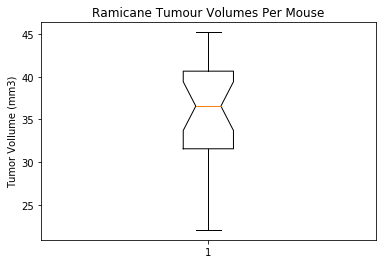

In [160]:
Ram1, Ram_ax1 = plt.subplots()
Ram_ax1.set_title('Ramicane Tumour Volumes Per Mouse')
Ram_ax1.set_ylabel('Tumor Vollume (mm3)')

Ram_ax1.boxplot(Ramicane["Tumor Volume (mm3)"], notch=True, flierprops=green_diamond)
plt.show()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
